# Using PointObject with TIFF image stacks
----
Instead of using point localisation data as input it is possible to load rendered images instead. This allows the easy usage of the contour fitting and curvature calculation parts on already existing movies. In the following the relevant steps are explained to load a TIFF image stack and to calculate the curvature.

In [1]:
%pylab inline
import sys, os
sys.path.insert(1, "../")
sys.path.insert(1, "../lib")

import numpy as np
from IPython.display import HTML

from PointObject import PointObject
from HTMLtable   import HTMLtable

htmlTable = HTMLtable()

Populating the interactive namespace from numpy and matplotlib


../lib/tifffile.py:237: UserWarning: failed to import the optional _tifffile C extension module.
Loading of some compressed images will be very slow.
Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "failed to import the optional _tifffile C extension module.\n"


### Loading the image stack
Instead of loading point localisation data we directly import a rendered image, i.e. a TIFF stack. The frame range that will be read can be limited to only select the relevant part of the movie.
**Note:** By default an extra space of 20 pixels is added at each border. This is done to ensure that the contour fitting algorithm works on objects that would extend outside of the field of view.
```python
    def loadPixelImage(fname, pixelSize=1.0, start=None, end=None, padding=[20,20]):
        """
        Load a pixel image into the pipeline.
        
        Instead of generating a super-resolved image from point localisation
        data the pipeline can load any pixel image instead. The consecutive
        steps of contour fitting and curvature calculation can then be used
        on this input.
        
        Input:
          fname (str):       Image file to load
          
          pixelSize (float): Set the pixel size in nm
          
          start (int):       The first frame to load
          
          end (int):         The last frame to include
          
          padding (list):    Must be a list of two int specifying the width
                             in pixels of the dark region that will be added
                             to the images at the outside edges. This is done
                             to allow the constricting contour fitting to fully
                             close on objects even if they are extending out
                             of the frame.
        """
```

In [3]:
mito = PointObject()
fname = "/tmp/cropped_classifier5_origigi_resized_median-blur-30_autothresholded.tif"
mito.loadPixelImage(fname, pixelSize=30, start=7, end=10)

Finished loading 4 frames from /tmp/cropped_classifier5_origigi_resized_median-blur-30_autothresholded.tif


Now the images are loaded and set correctly inside the PointObject to allow the calculation of the contour and curvature as with data coming from point localisation input.

Finished contour fitting in: 0:06:36


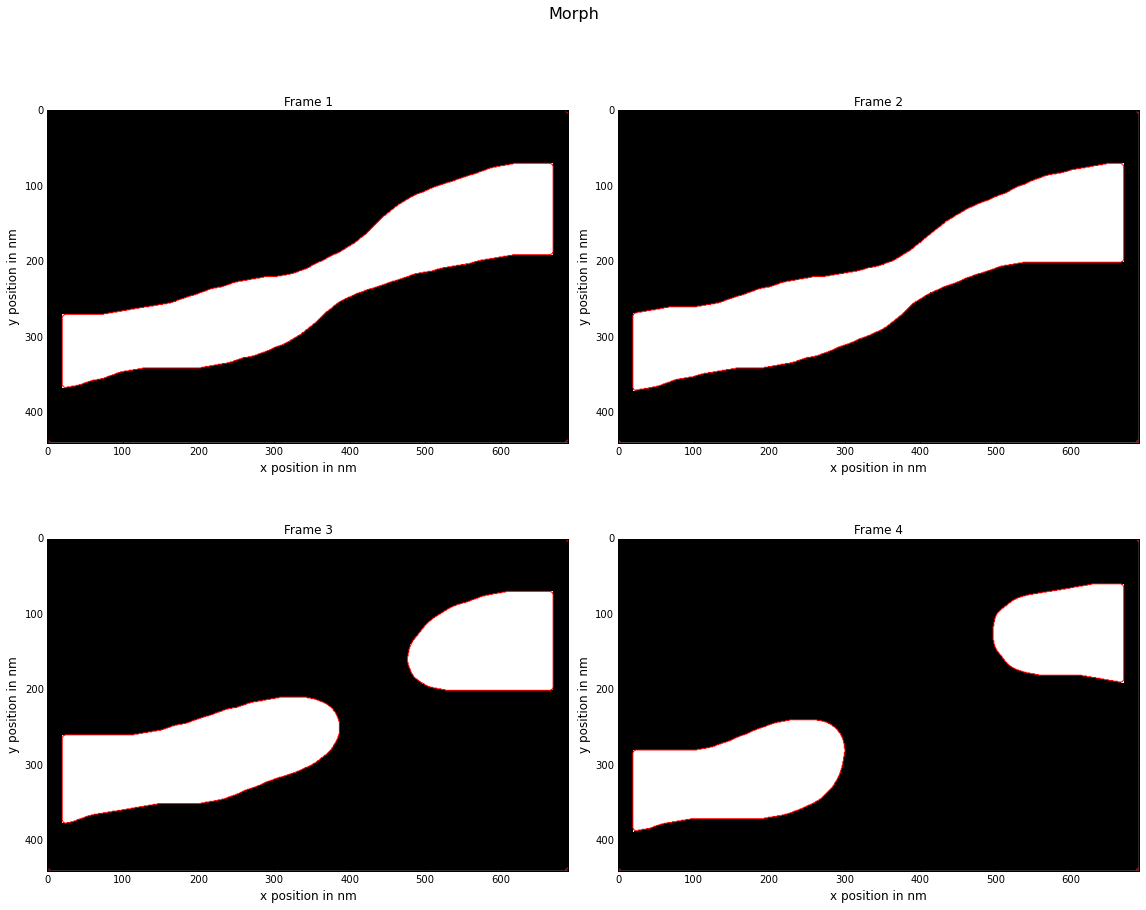

In [4]:
mito.calculateContour()

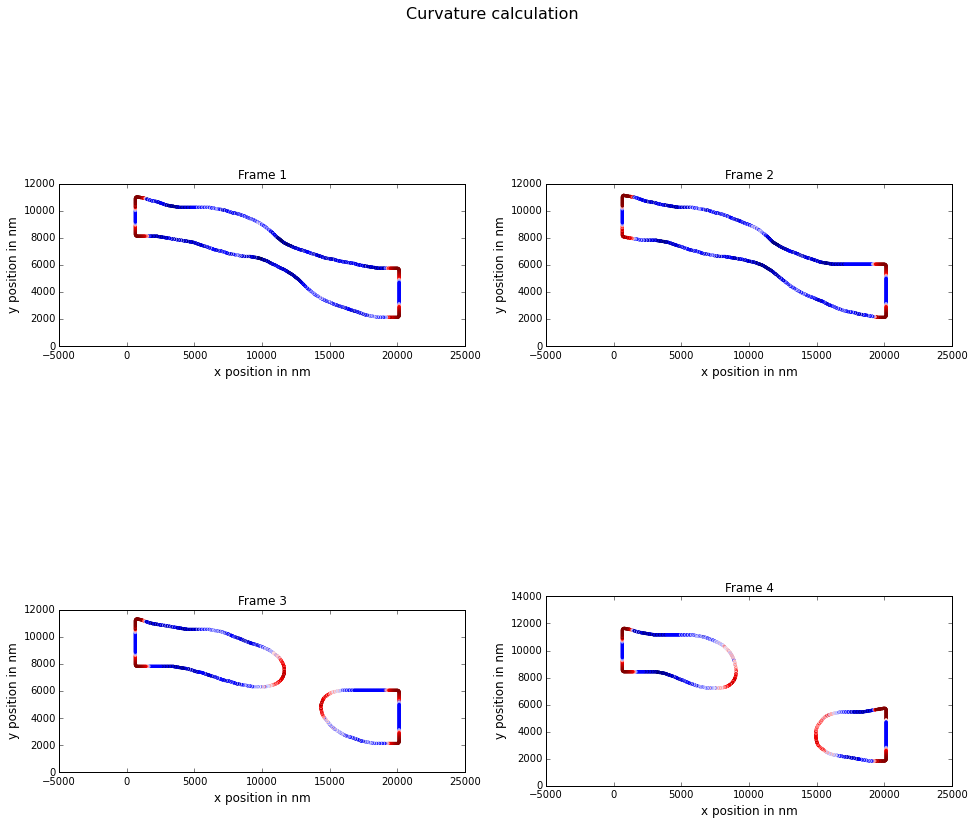

In [5]:
mito.calculateCurvature(smooth=True, window=10, percentiles=[99,10])

In [6]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [8]:
mito.curvature.selectCurvature(xlim=[7000,17000], ylim=[2000,10000])

/home/niklas/bin/anaconda3/lib/python3.4/site-packages/matplotlib/backend_bases.py:2399: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


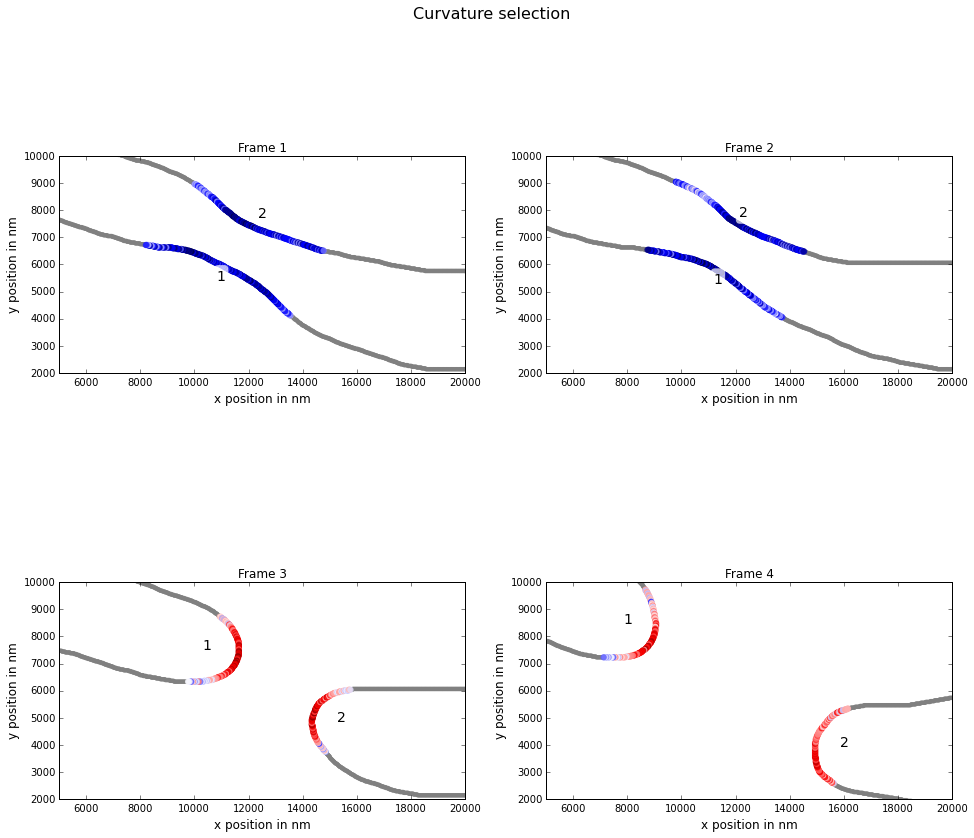

In [10]:
mito.curvature.showSelected(xlim=[5000,20000], ylim=[2000,10000], s=40)

In [11]:
HTML( mito.curvature.table() )

Frame,1,2,Sum
1,0.02,0.02,0.03
2,0.02,0.02,0.04
3,-0.05,-0.05,-0.10
4,-0.05,-0.04,-0.09


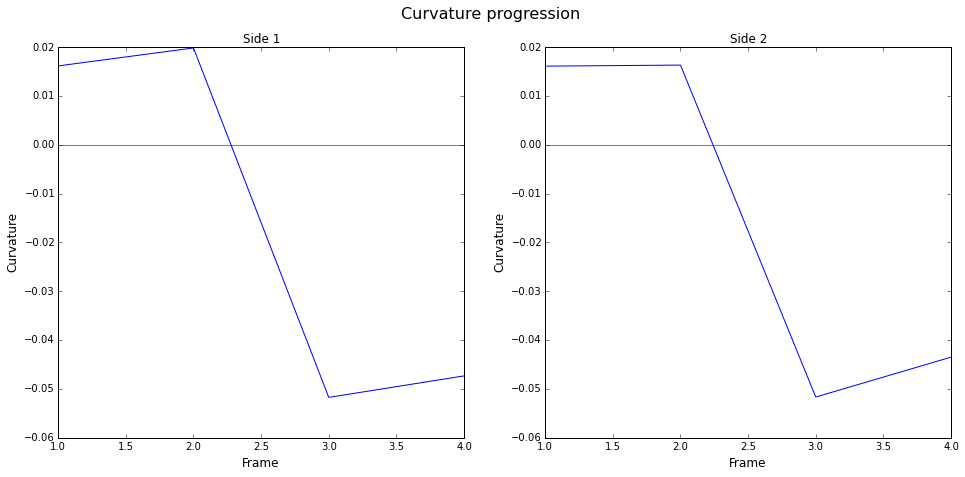

In [12]:
mito.curvature.plotCurvature()